# Import Packages

In [1]:
#standard package loadout
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#import image
from IPython.display import Image

#import stats
import scipy.stats as stats

#regression package loadout
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

# Load ETL Dataset

In [2]:
# load crime dataset
crime = pd.read_csv("data/geographicDescriptors.csv")
crime.head()

,Unnamed: 0,Community Area Name,Community Area,Pop,Income,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,...,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal
0,0,Rogers Park,1,54991,24323,0.240,0.071,0.093,0.164,0.272,...,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.109763,0.182175,0.080850,0.372788
1,1,West Ridge,2,71942,23498,0.174,0.076,0.100,0.171,0.383,...,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.063245,0.135651,0.047636,0.246532
2,2,Uptown,3,56362,37180,0.239,0.038,0.101,0.108,0.233,...,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.090469,0.179518,0.091462,0.361449
3,3,Lincoln Square,4,39493,39524,0.127,0.016,0.079,0.106,0.260,...,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.060745,0.150001,0.048920,0.259666
4,4,North Center,5,31867,56893,0.061,0.006,0.046,0.060,0.278,...,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.037374,0.174412,0.039006,0.250792


In [3]:
# review data info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 21 columns):
Unnamed: 0             77 non-null int64
Community Area Name    77 non-null object
Community Area         77 non-null int64
Pop                    77 non-null int64
Income                 77 non-null int64
Poverty                77 non-null float64
CrowdedHousing         77 non-null float64
Unemployed             77 non-null float64
NoDiploma              77 non-null float64
Dependency             77 non-null float64
Hardship               77 non-null float64
VacantBuildings        77 non-null float64
AbandonedVehicles      77 non-null float64
StreetLights           77 non-null float64
AlleyLights            77 non-null float64
Potholes               77 non-null float64
Graffiti               77 non-null float64
CrimePerson            77 non-null float64
CrimeProperty          77 non-null float64
CrimeSociety           77 non-null float64
CrimeTotal             77 non-null float64
dty

# Geographic Descriptive Analytics

This step was completed by loading the geographicDescriptors dataset that was created in the ETL notebook into Tableau along with the community area geoshape file obtained from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6 and indexing them together on community area number. The gif below contains the data visualizations created for each geographicDescriptors data variable.

In [4]:
# Load gif of images for all data by Community Area created in Tableau. Note: It takes a moment to begin
# Gif created using GNU Image Manipulation Program (GIMP)
Image(url='images/GeoSocEcon.gif')  

#### Notable Findings:

1. South and west Chicago tend to have lower socioeconomic standing than east and north Chicago.
2. South and west Chicago tend to have more cases of infrastructure degradation than east and north Chicago.
3. Areas with higher per capita income have higher rates of property crime than other areas where as areas with lower per capita income tend to have higher rates of person and/or society crime.

# Descriptive Analytics

In [5]:
# remove unnamed column as it is index key from ETL and the Community Identifiers as they are not needed for additional analysis
crimeClean = crime.drop(['Unnamed: 0', 'Community Area Name', 'Community Area'], axis=1)
crimeClean.head()

,Pop,Income,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,Hardship,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal
0,54991,24323,0.240,0.071,0.093,0.164,0.272,39.7,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.109763,0.182175,0.080850,0.372788
1,71942,23498,0.174,0.076,0.100,0.171,0.383,44.3,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.063245,0.135651,0.047636,0.246532
2,56362,37180,0.239,0.038,0.101,0.108,0.233,29.9,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.090469,0.179518,0.091462,0.361449
3,39493,39524,0.127,0.016,0.079,0.106,0.260,23.8,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.060745,0.150001,0.048920,0.259666
4,31867,56893,0.061,0.006,0.046,0.060,0.278,14.9,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.037374,0.174412,0.039006,0.250792


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E5DDFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FE195F8>]], dtype=object)

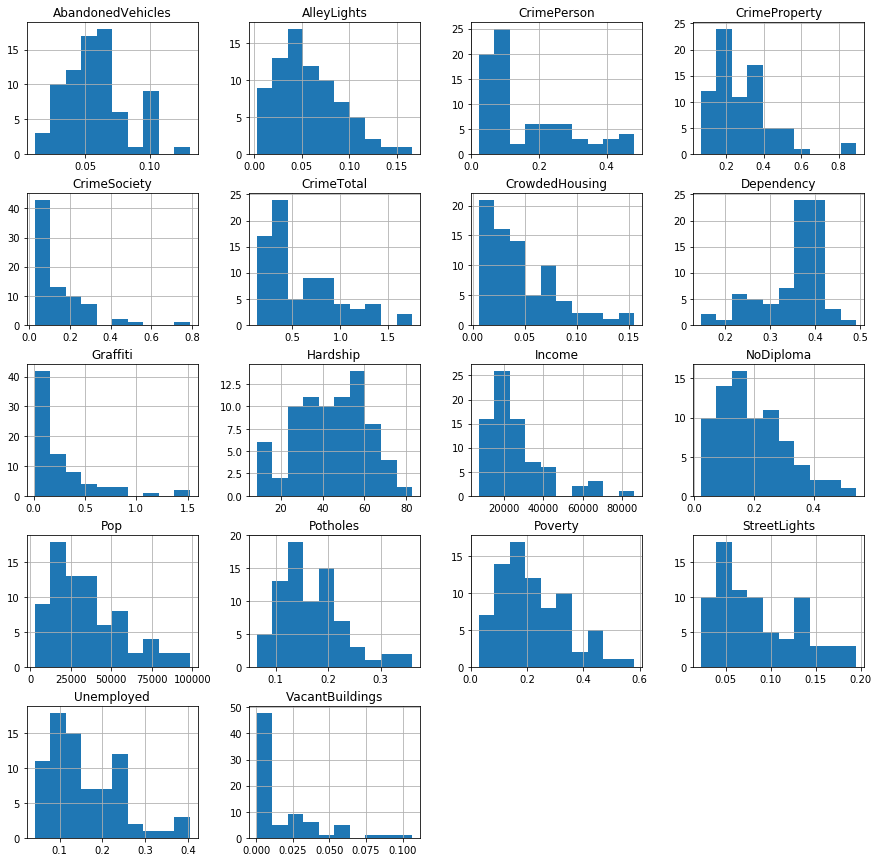

In [6]:
# create a histogram for each variable to see data visually
crimeClean.hist(figsize=(15,15))

### Pop

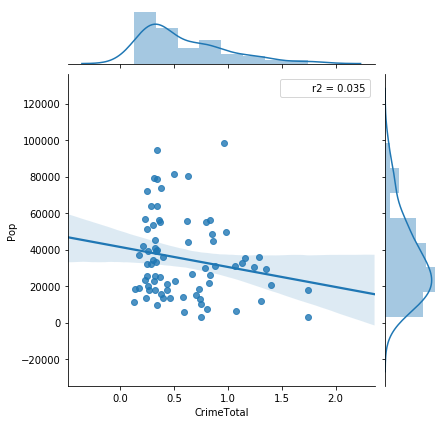

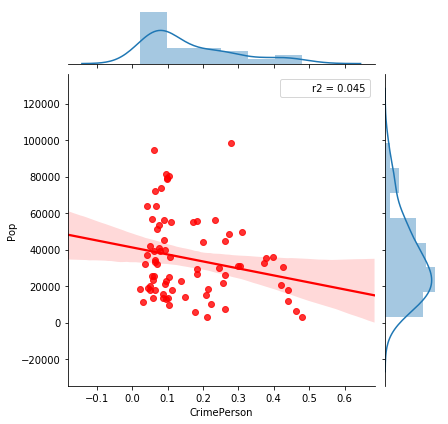

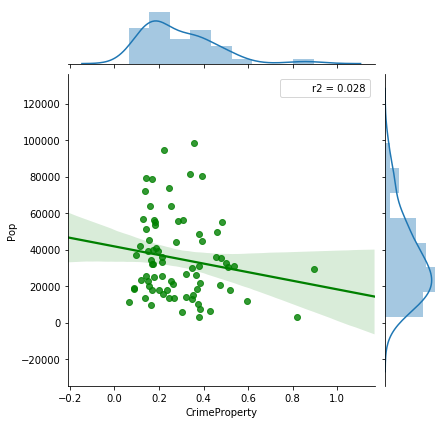

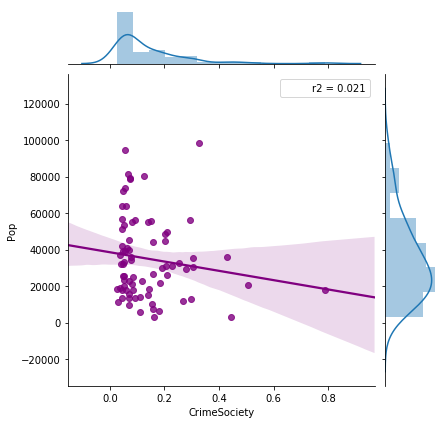

In [7]:
# explore relationship between CrimeTotal and Pop
x= crimeClean['CrimeTotal']
y= crimeClean['Pop']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Pop
x= crimeClean['CrimePerson']
y= crimeClean['Pop']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Pop
x= crimeClean['CrimeProperty']
y= crimeClean['Pop']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Pop
x= crimeClean['CrimeSociety']
y= crimeClean['Pop']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Pop was used to convert the crime statistics into incidents per capita but has no further use in data analysis at this time. It will need to be dropped from table prior to doing modeling.

### Income

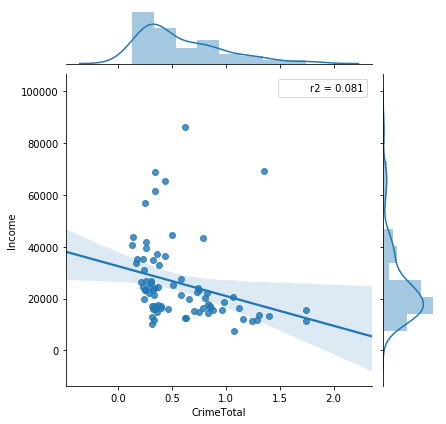

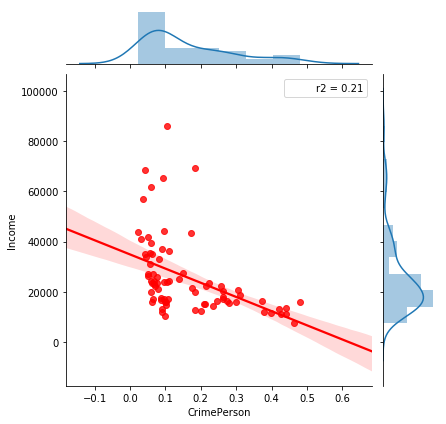

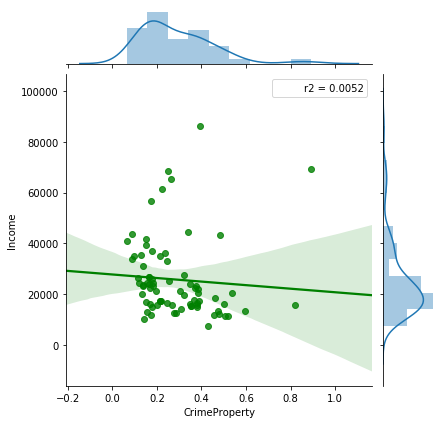

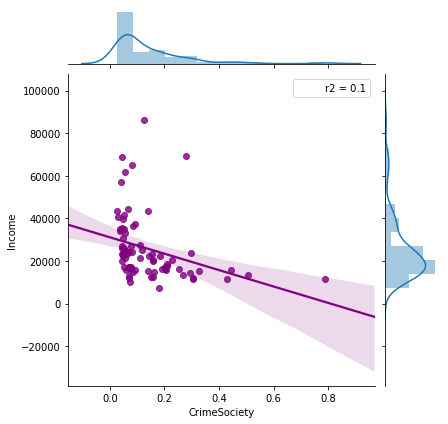

In [8]:
# explore relationship between CrimeTotal and Income
x= crimeClean['CrimeTotal']
y= crimeClean['Income']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Income
x= crimeClean['CrimePerson']
y= crimeClean['Income']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Income
x= crimeClean['CrimeProperty']
y= crimeClean['Income']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Income
x= crimeClean['CrimeSociety']
y= crimeClean['Income']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Income has a weak negative r2 with CrimePerson & CrimeSociety.

### Poverty

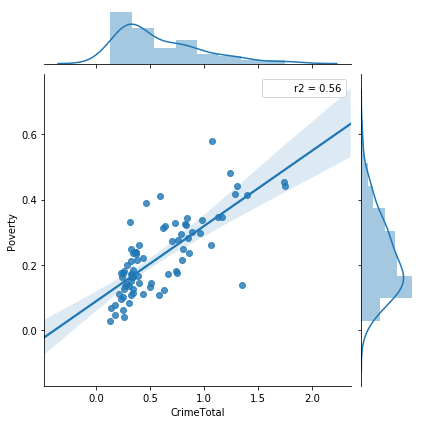

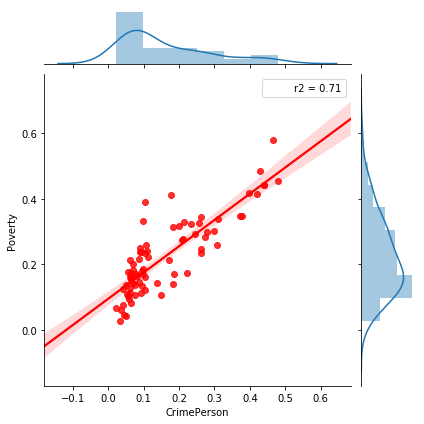

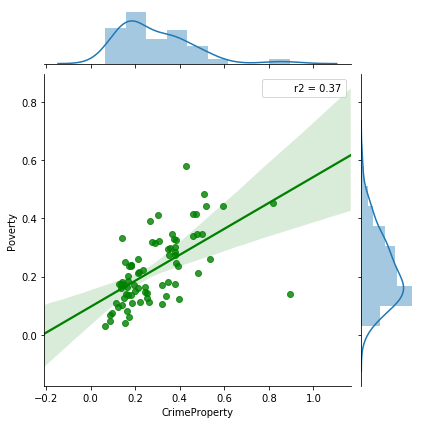

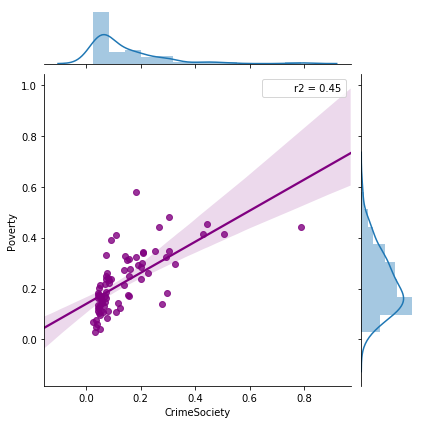

In [9]:
# explore relationship between CrimeTotal and Poverty
x= crimeClean['CrimeTotal']
y= crimeClean['Poverty']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Poverty
x= crimeClean['CrimePerson']
y= crimeClean['Poverty']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Poverty
x= crimeClean['CrimeProperty']
y= crimeClean['Poverty']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Poverty
x= crimeClean['CrimeSociety']
y= crimeClean['Poverty']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Poverty has a strong r2 with CrimePerson, and moderate r2 with CrimeTotal (which includes CrimePerson), CrimeProperty, and CrimeSociety.

### CrowdedHousing

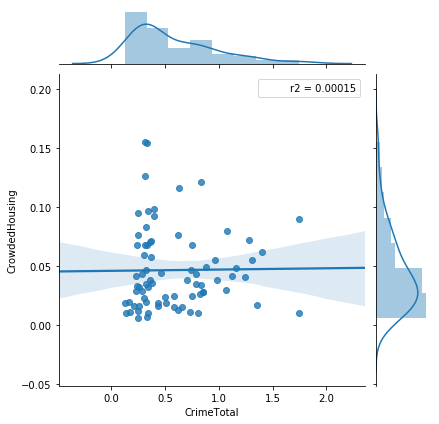

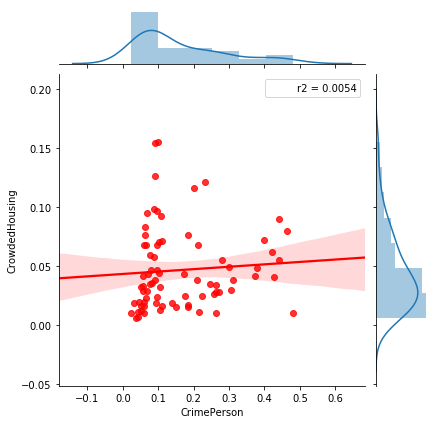

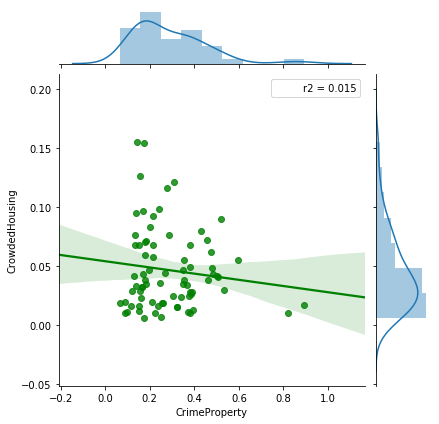

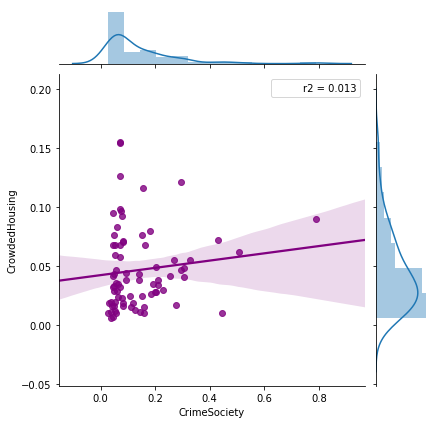

In [10]:
# explore relationship between CrimeTotal and CrowdedHousing
x= crimeClean['CrimeTotal']
y= crimeClean['CrowdedHousing']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and CrowdedHousing
x= crimeClean['CrimePerson']
y= crimeClean['CrowdedHousing']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and CrowdedHousing
x= crimeClean['CrimeProperty']
y= crimeClean['CrowdedHousing']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and CrowdedHousing
x= crimeClean['CrimeSociety']
y= crimeClean['CrowdedHousing']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> CrowdedHousing's r2 indicates it has almost no bearing on crime.

### Unemployed

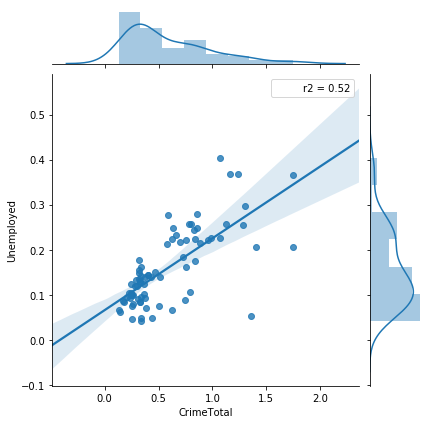

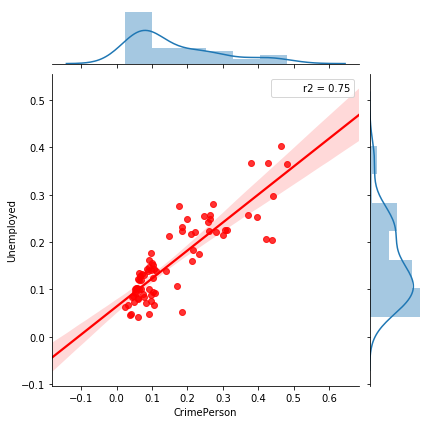

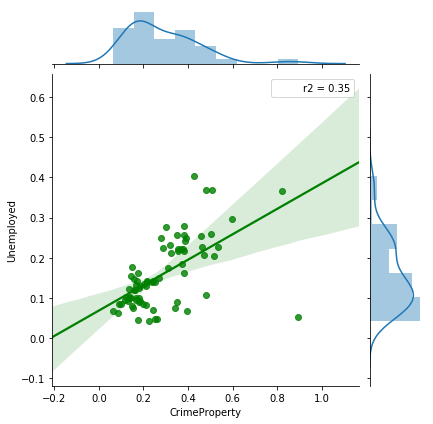

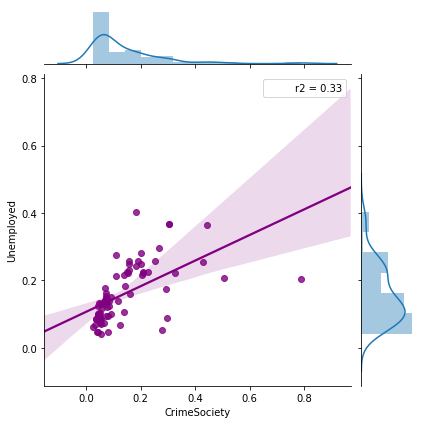

In [11]:
# explore relationship between CrimeTotal and Unemployed
x= crimeClean['CrimeTotal']
y= crimeClean['Unemployed']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Unemployed
x= crimeClean['CrimePerson']
y= crimeClean['Unemployed']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Unemployed
x= crimeClean['CrimeProperty']
y= crimeClean['Unemployed']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Unemployed
x= crimeClean['CrimeSociety']
y= crimeClean['Unemployed']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Unemployed has a strong r2 with CrimePerson, and moderate r2 with CrimeTotal (which includes CrimePerson), CrimeProperty, and CrimeSociety.

### NoDiploma

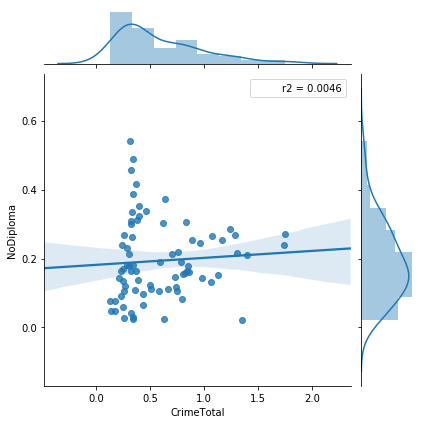

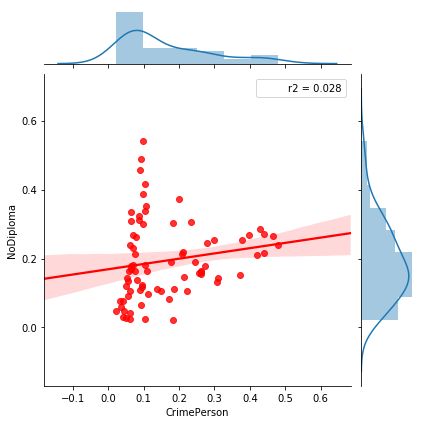

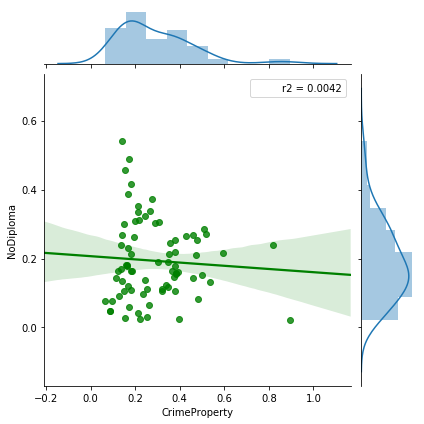

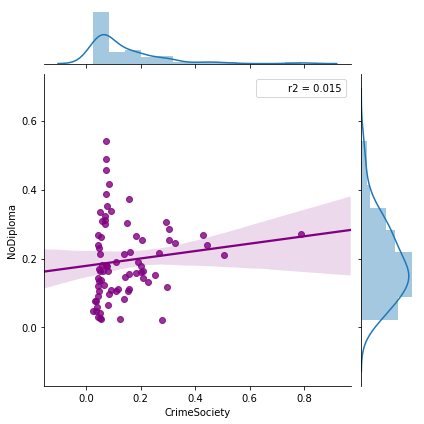

In [12]:
# explore relationship between CrimeTotal and NoDiploma
x= crimeClean['CrimeTotal']
y= crimeClean['NoDiploma']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and NoDiploma
x= crimeClean['CrimePerson']
y= crimeClean['NoDiploma']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and NoDiploma
x= crimeClean['CrimeProperty']
y= crimeClean['NoDiploma']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and NoDiploma
x= crimeClean['CrimeSociety']
y= crimeClean['NoDiploma']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> NoDiploma's r2 indicates it has almost no bearing on crime.

### Dependency

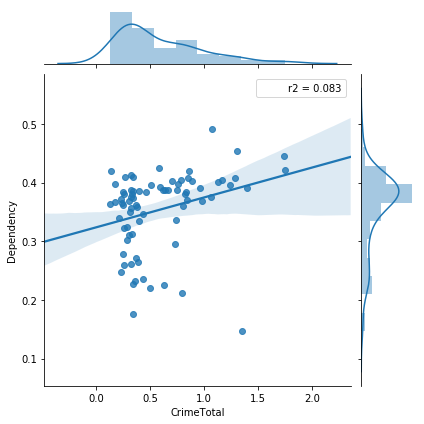

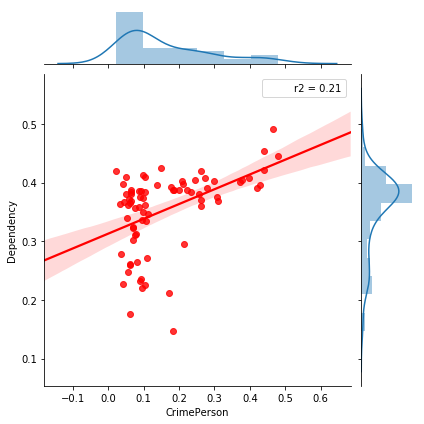

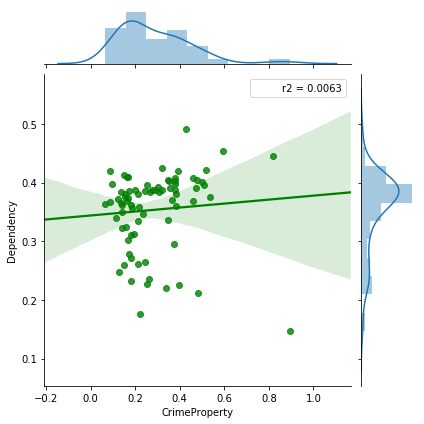

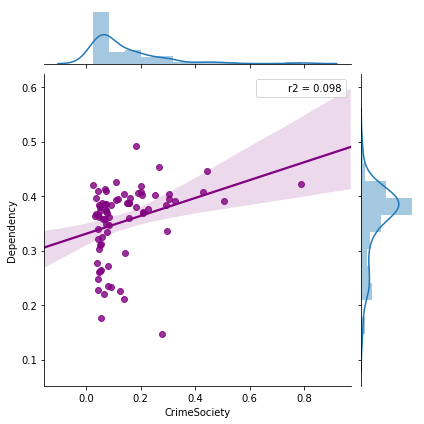

In [13]:
# explore relationship between CrimeTotal and Dependency
x= crimeClean['CrimeTotal']
y= crimeClean['Dependency']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Dependency
x= crimeClean['CrimePerson']
y= crimeClean['Dependency']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Dependency
x= crimeClean['CrimeProperty']
y= crimeClean['Dependency']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Dependency
x= crimeClean['CrimeSociety']
y= crimeClean['Dependency']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Dependency has a weak r2 with CrimePerson & CrimeSociety.

### Hardship

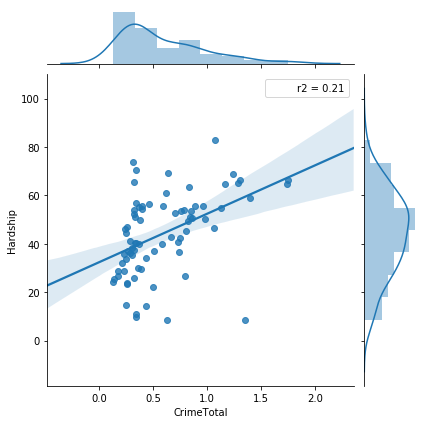

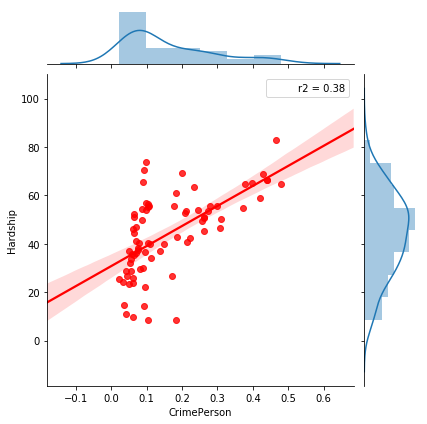

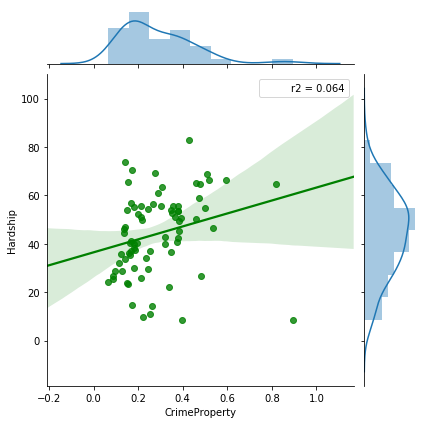

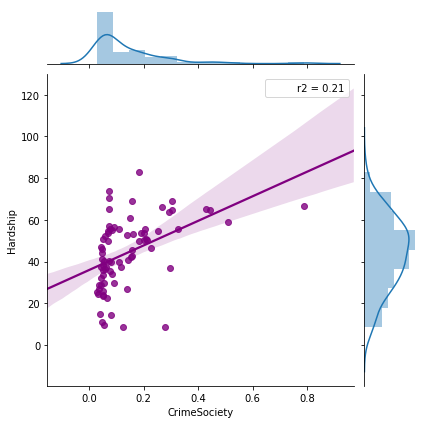

In [14]:
# explore relationship between CrimeTotal and Hardship
x= crimeClean['CrimeTotal']
y= crimeClean['Hardship']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Hardship
x= crimeClean['CrimePerson']
y= crimeClean['Hardship']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Hardship
x= crimeClean['CrimeProperty']
y= crimeClean['Hardship']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Hardship
x= crimeClean['CrimeSociety']
y= crimeClean['Hardship']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Hardship has a moderate r2 with CrimePerson and a weak r2 with CrimeTotal (which includes CrimePerson) and CrimeSociety.

### VacantBuildings

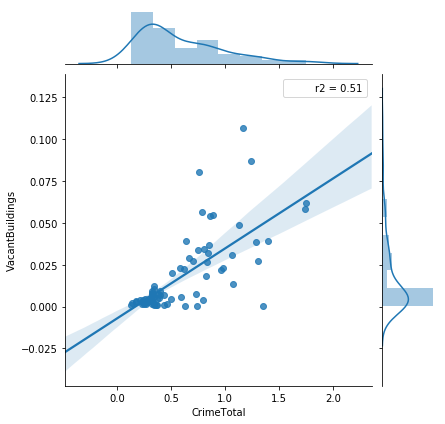

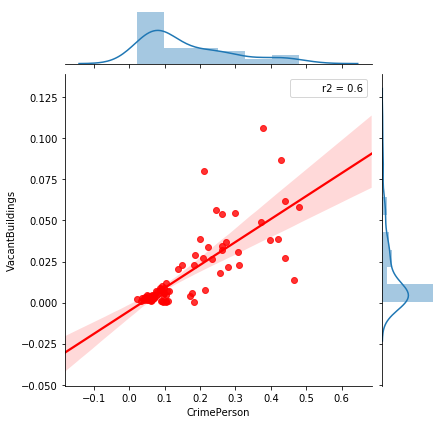

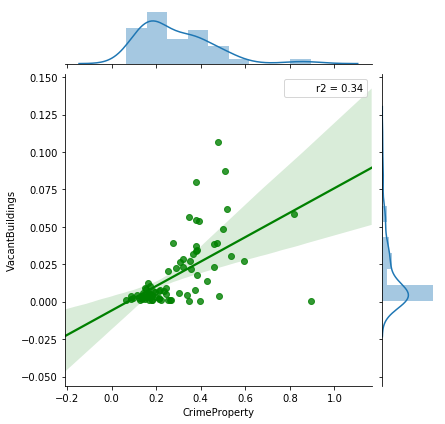

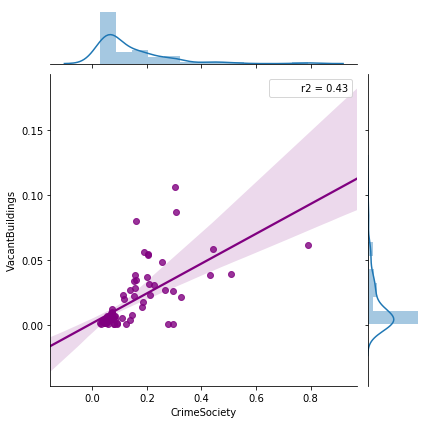

In [15]:
# explore relationship between CrimeTotal and VacantBuildings
x= crimeClean['CrimeTotal']
y= crimeClean['VacantBuildings']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and VacantBuildings
x= crimeClean['CrimePerson']
y= crimeClean['VacantBuildings']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and VacantBuildings
x= crimeClean['CrimeProperty']
y= crimeClean['VacantBuildings']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and VacantBuildings
x= crimeClean['CrimeSociety']
y= crimeClean['VacantBuildings']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> VacantBuildings has a moderate r2 with CrimeTotal, CrimePerson, CrimeProperty, and CrimeSociety.

### AbandonedVehicles

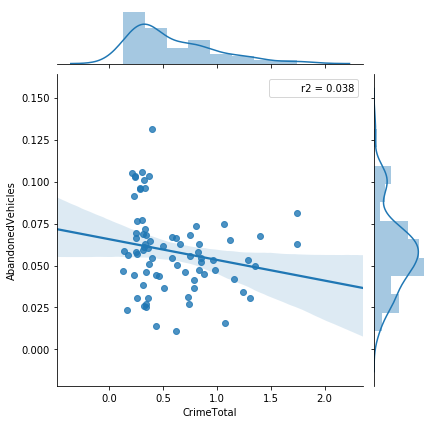

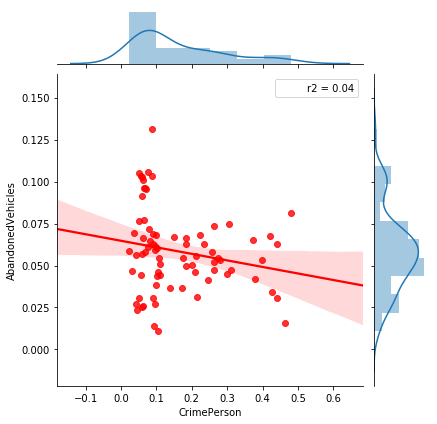

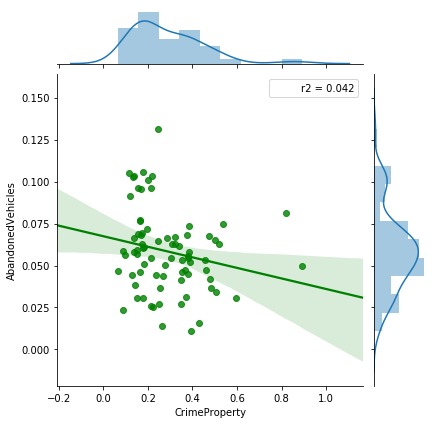

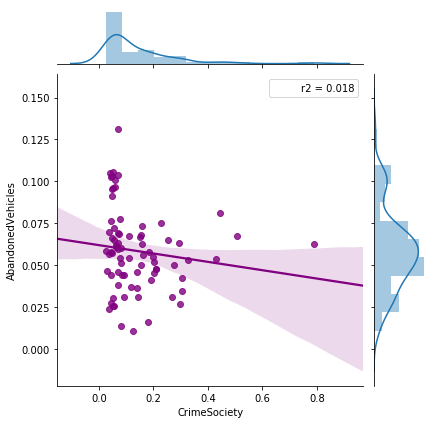

In [16]:
# explore relationship between CrimeTotal and AbandonedVehicles
x= crimeClean['CrimeTotal']
y= crimeClean['AbandonedVehicles']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and AbandonedVehicles
x= crimeClean['CrimePerson']
y= crimeClean['AbandonedVehicles']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and AbandonedVehicles
x= crimeClean['CrimeProperty']
y= crimeClean['AbandonedVehicles']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and AbandonedVehicles
x= crimeClean['CrimeSociety']
y= crimeClean['AbandonedVehicles']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> AbandonedVehicles's r2 indicates it has almost no bearing on crime.

### StreetLights

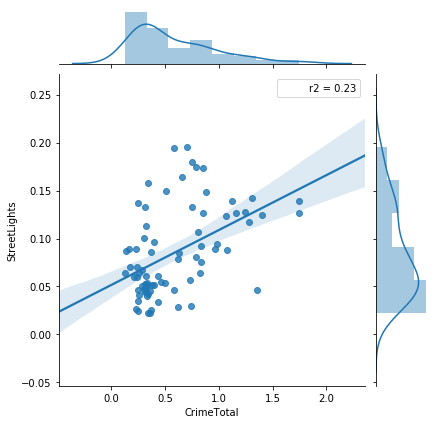

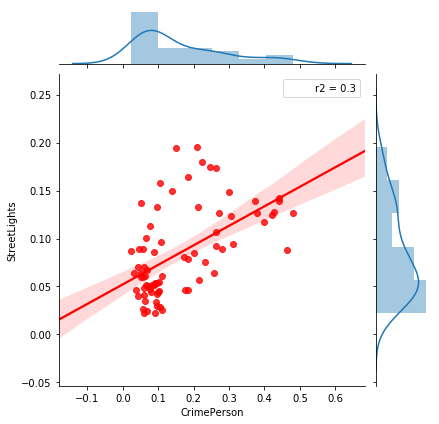

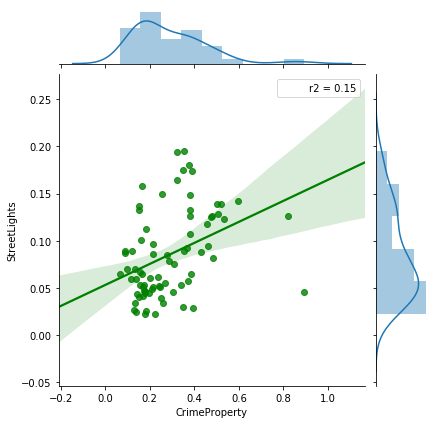

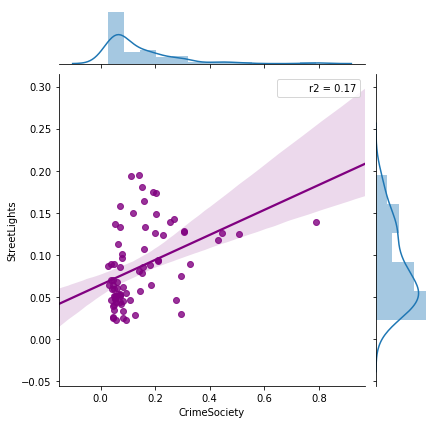

In [17]:
# explore relationship between CrimeTotal and Street Lights Out
x= crimeClean['CrimeTotal']
y= crimeClean['StreetLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Street Lights Out
x= crimeClean['CrimePerson']
y= crimeClean['StreetLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Street Lights Out
x= crimeClean['CrimeProperty']
y= crimeClean['StreetLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between CrimeSociety and Street Lights Out
x= crimeClean['CrimeSociety']
y= crimeClean['StreetLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> StreetLights has a moderate r2 with CrimePerson and a weak r2 with CrimeTotal (which includes CrimePerson), CrimeProperty, and CrimeSociety.

### AlleyLights

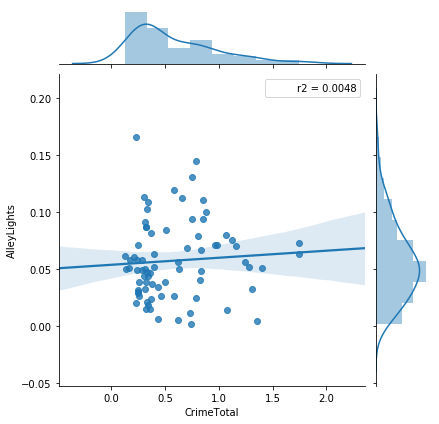

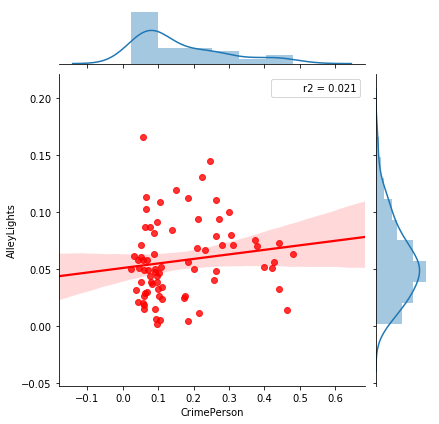

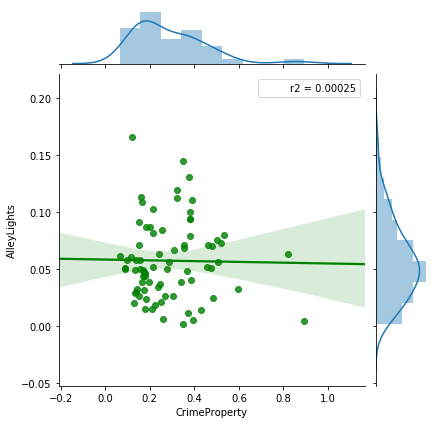

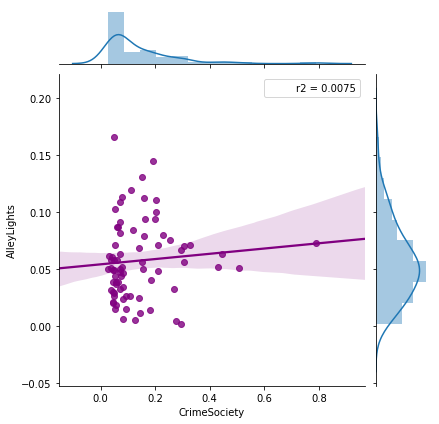

In [18]:
# explore relationship between CrimeTotal and Alley Lights Out
x= crimeClean['CrimeTotal']
y= crimeClean['AlleyLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Alley Lights Out
x= crimeClean['CrimePerson']
y= crimeClean['AlleyLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Alley Lights Out
x= crimeClean['CrimeProperty']
y= crimeClean['AlleyLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between Crime Type_SOCIETY and Alley Lights Out
x= crimeClean['CrimeSociety']
y= crimeClean['AlleyLights']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> AlleyLights's r2 indicates it has almost no bearing on crime.

### Potholes

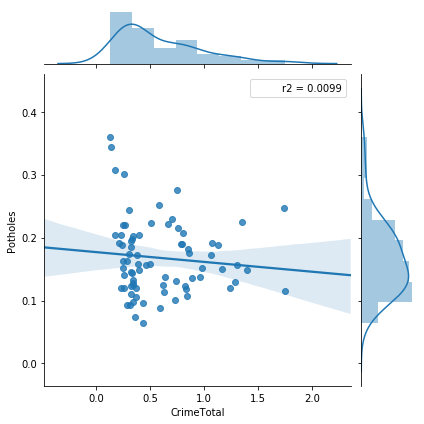

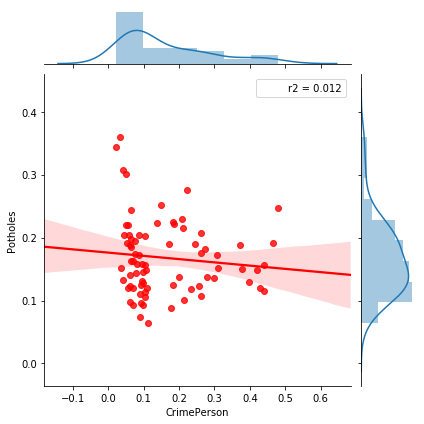

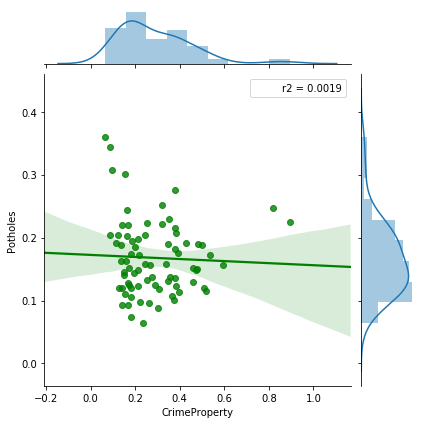

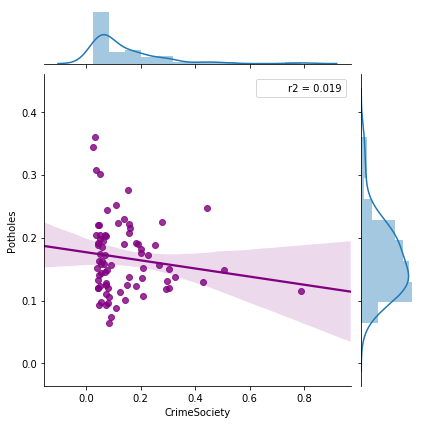

In [19]:
# explore relationship between CrimeTotal and Potholes
x= crimeClean['CrimeTotal']
y= crimeClean['Potholes']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Potholes
x= crimeClean['CrimePerson']
y= crimeClean['Potholes']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Potholes
x= crimeClean['CrimeProperty']
y= crimeClean['Potholes']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between Crime Type_SOCIETY and Potholes
x= crimeClean['CrimeSociety']
y= crimeClean['Potholes']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Potholes's r2 indicates it has almost no bearing on crime.

### Graffiti

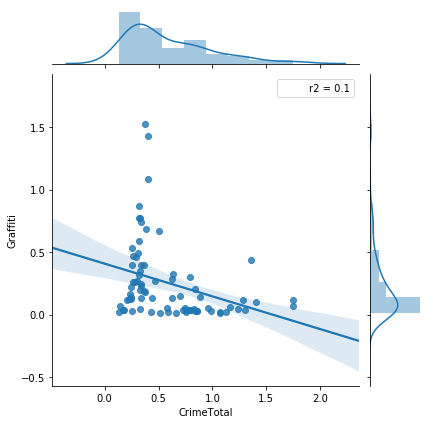

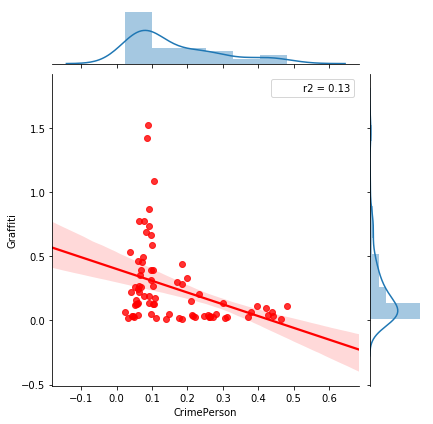

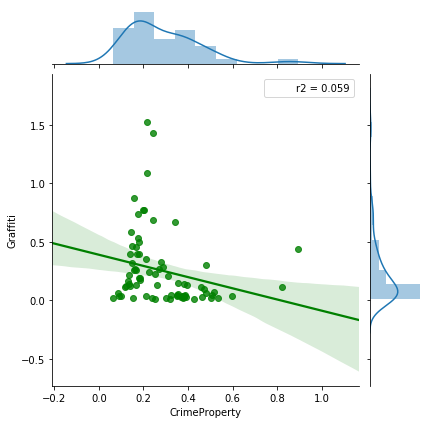

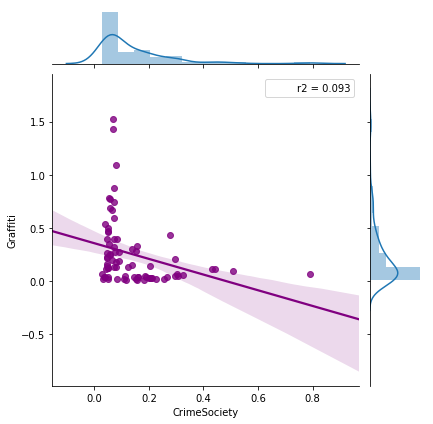

In [20]:
# explore relationship between CrimeTotal and Graffiti
x= crimeClean['CrimeTotal']
y= crimeClean['Graffiti']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

# explore relationship between CrimePerson and Graffiti
x= crimeClean['CrimePerson']
y= crimeClean['Graffiti']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})

# explore relationship between CrimeProperty and Graffiti
x= crimeClean['CrimeProperty']
y= crimeClean['Graffiti']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

# explore relationship between Crime Type_SOCIETY and Graffiti
x= crimeClean['CrimeSociety']
y= crimeClean['Graffiti']

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})

### Findings:
> Graffiti has a weak negative r2 with CrimePerson & CrimeTotal (which includes CrimePerson).

### Overall Findings:
> The most promising variables in the data prior to doing modeling seem to be:
>> - Poverty
>> - Unemployed
>> - VacantBuildings
>> - StreetLights

# Correlation between variables

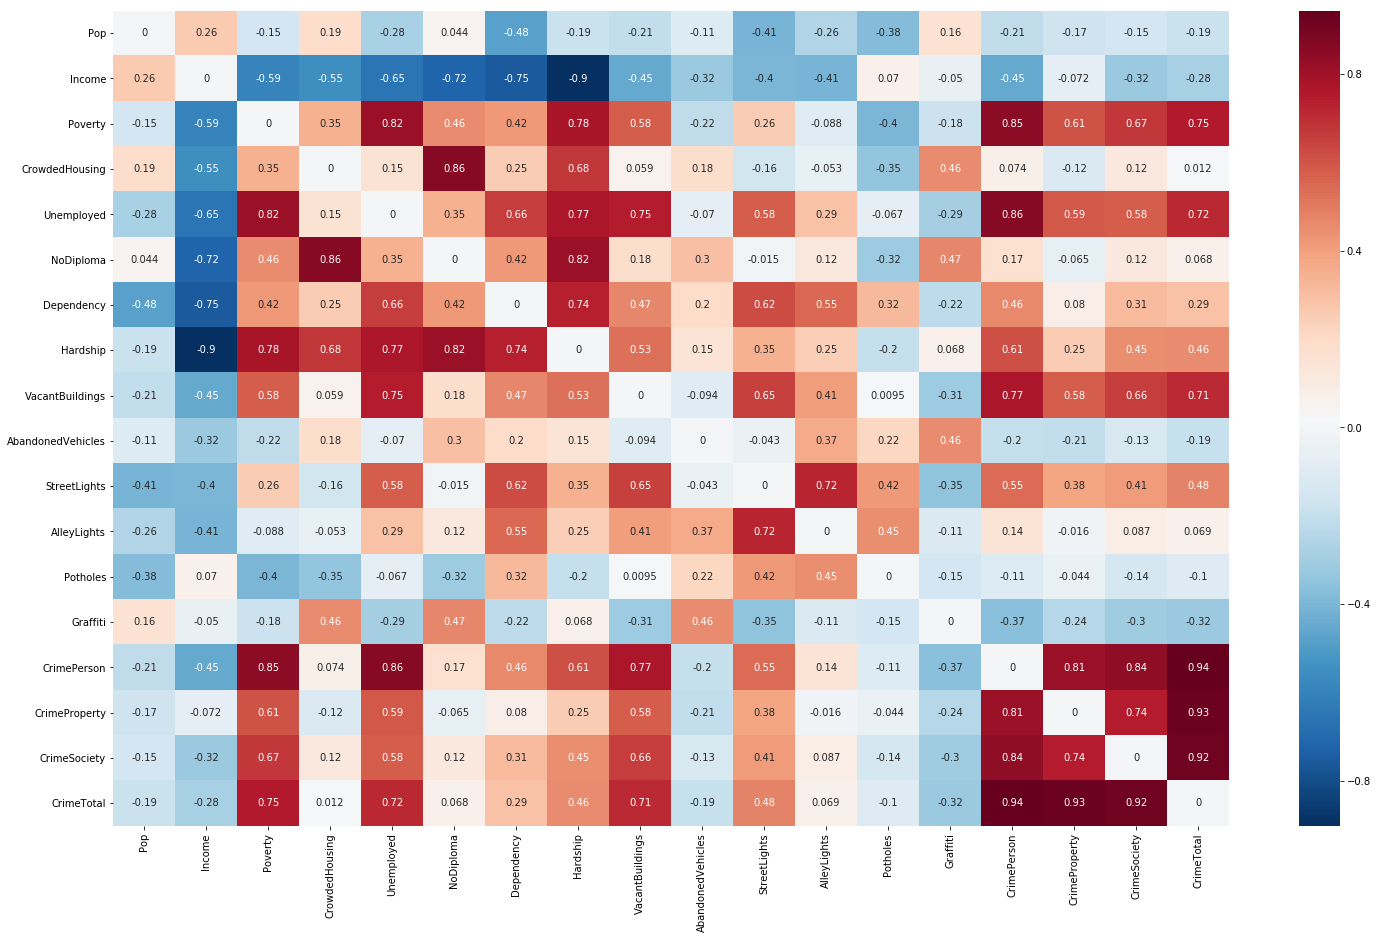

In [21]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = crimeClean.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### Findings:
> Pop needs to be removed because it was used to calculate many of the city infrastructure per capita and crime per capita scores.

> We can see that Income has a high negative correlation with many of the socioeconomic variables and will likely cause multicollineary issues when conducting data modeling.

> We can see that Hardship has a high correlation with many of the socioeconomic variables and will likely cause multicollineary issues when conducting data modeling.

In [22]:
# remove Hardship and Income as they are too correlated to other variables in order to reduce multicollineary
# remove Pop as it was used to create per capita values in other columns
crimeClean1 = crimeClean.drop(['Pop', 'Hardship', 'Income'], axis=1)
crimeClean1.head()

,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal
0,0.240,0.071,0.093,0.164,0.272,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.109763,0.182175,0.080850,0.372788
1,0.174,0.076,0.100,0.171,0.383,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.063245,0.135651,0.047636,0.246532
2,0.239,0.038,0.101,0.108,0.233,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.090469,0.179518,0.091462,0.361449
3,0.127,0.016,0.079,0.106,0.260,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.060745,0.150001,0.048920,0.259666
4,0.061,0.006,0.046,0.060,0.278,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.037374,0.174412,0.039006,0.250792


# CrimeTotal Linear Regression Modeling

In [23]:
# remove CrimePerson, CrimeProperty, CrimeSociety in order to test CrimeTotal
crimeTotalData = crimeClean1.drop(['CrimePerson', 'CrimeProperty', 'CrimeSociety'], axis=1)
crimeTotalData.head()

,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimeTotal
0,0.240,0.071,0.093,0.164,0.272,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.372788
1,0.174,0.076,0.100,0.171,0.383,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.246532
2,0.239,0.038,0.101,0.108,0.233,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.361449
3,0.127,0.016,0.079,0.106,0.260,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.259666
4,0.061,0.006,0.046,0.060,0.278,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.250792


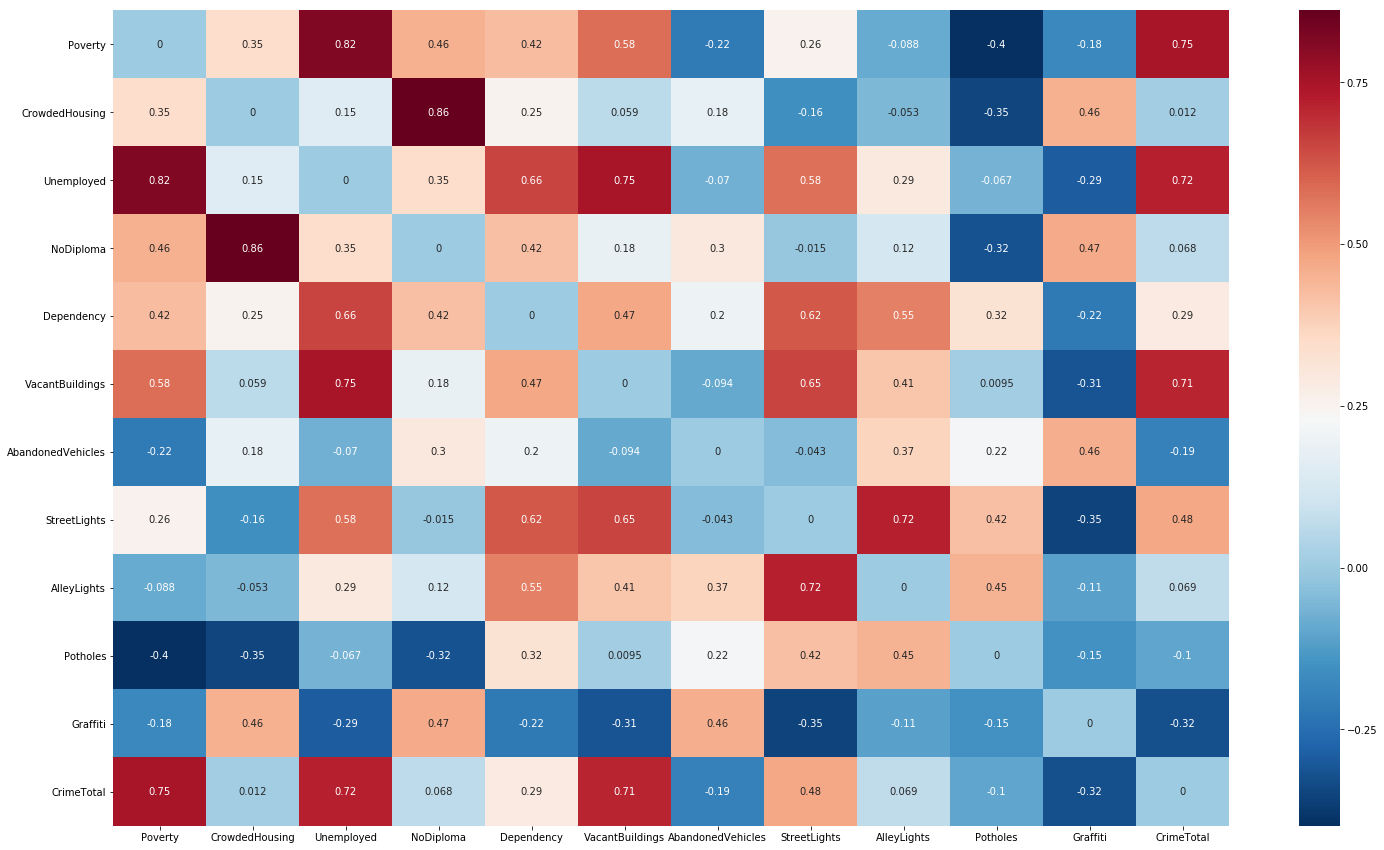

In [24]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = crimeTotalData.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### Findings:
>CrimeTotal is highly correlated with Poverty, Unemployment, and VacantBuildings.

>CrimeTotal is moderately correlated with StreetLights.

>CrimeTotal has a weak correlation with Dependency.

>CrimeTotal has a weak negative correlation with Graffiti.

### All Variable Model

In [25]:
#assigning columns to X and Y variables
y = crimeTotalData['CrimeTotal'] 
X = crimeTotalData.drop(['CrimeTotal'], axis =1)

In [26]:
# create full dataset model
modelFull = lm.LinearRegression()
modelFull.fit(X, y)   
modelFull_y = modelFull.predict(X)
print 'Coefficients: ', modelFull.coef_
print "y-intercept ", modelFull.intercept_

Coefficients:  [ 2.58400338  1.7480134   0.16729586 -1.07435432 -1.85297851  4.71621707
  2.89220761  2.60342877 -1.41021953  0.97396521 -0.05066815]
y-intercept  0.219261888702


In [27]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelFull.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '2.584'),
 ('CrowdedHousing', '1.748'),
 ('Unemployed', '0.167'),
 ('NoDiploma', '-1.074'),
 ('Dependency', '-1.853'),
 ('VacantBuildings', '4.716'),
 ('AbandonedVehicles', '2.892'),
 ('StreetLights', '2.603'),
 ('AlleyLights', '-1.410'),
 ('Potholes', '0.974'),
 ('Graffiti', '-0.051')]

In [28]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelFull_y)
print "variance or r-squared: ", explained_variance_score(y, modelFull_y)

mean square error:  0.027800082407
variance or r-squared:  0.806472736483


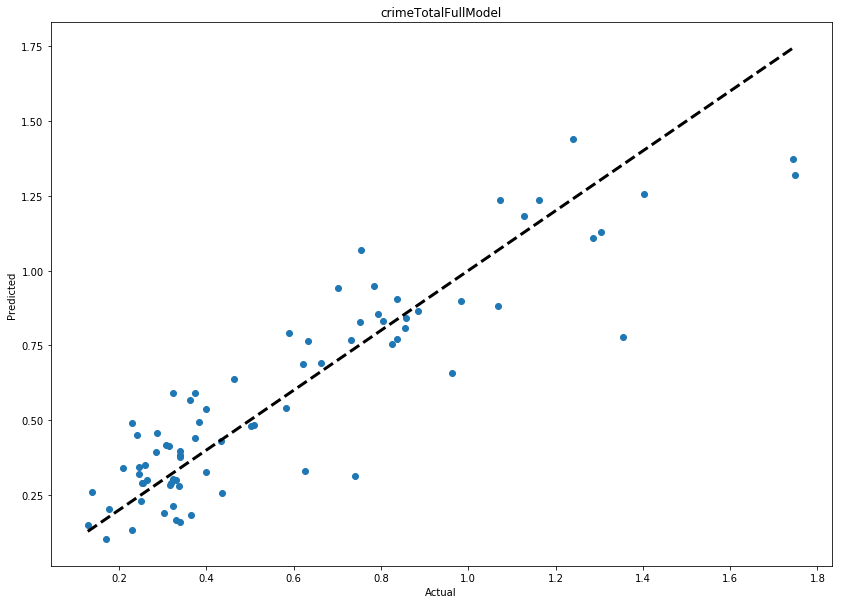

In [29]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelFull_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimeTotalFullModel')

In [30]:
# Review OLS
totalCrimeLRModelFull = sm.ols("CrimeTotal~Poverty+CrowdedHousing+Unemployed+NoDiploma+Dependency+VacantBuildings+AbandonedVehicles+StreetLights+AlleyLights+Potholes+Graffiti",crimeTotalData)
totalCrimeLRModelFull = totalCrimeLRModelFull.fit()
print totalCrimeLRModelFull.summary()

                            OLS Regression Results                            
Dep. Variable:             CrimeTotal   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     24.62
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           4.52e-19
Time:                        18:56:40   Log-Likelihood:                 28.676
No. Observations:                  77   AIC:                            -33.35
Df Residuals:                      65   BIC:                            -5.227
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2193      0.15

### Findings:
>There is no condition number warning and adjusted R-squared is 0.774. This is a good model for consideration. However, we may be able to reduce the number of variables needed and still get similar results.

>Review of P indicates that the following variables are siginificant, at the 95% confidence level, to the model: Poverty, NoDiploma, Dependency, VacantBuildings, AbandonedVehicles, and StreetLights.

>We should evaluate a model using only the significant variables.

### Slimmed Variable Model

In [31]:
#assigning columns to X and Y variables
y = crimeTotalData['CrimeTotal'] 
X = crimeTotalData.drop(['CrimeTotal', 'CrowdedHousing', 'Unemployed', 'AlleyLights', 'Potholes', 'Graffiti'], axis =1)

In [32]:
# create slimmed dataset model
modelSlim = lm.LinearRegression()
modelSlim.fit(X, y)   
modelSlim_y = modelSlim.predict(X)
print 'Coefficients: ', modelSlim.coef_
print "y-intercept ", modelSlim.intercept_

Coefficients:  [ 2.58306602 -0.94116183 -1.34022943  4.53845842  2.25026646  2.05696128]
y-intercept  0.27709170368


In [33]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelSlim.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '2.583'),
 ('NoDiploma', '-0.941'),
 ('Dependency', '-1.340'),
 ('VacantBuildings', '4.538'),
 ('AbandonedVehicles', '2.250'),
 ('StreetLights', '2.057')]

In [34]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelSlim_y)
print "variance or r-squared: ", explained_variance_score(y, modelSlim_y)

mean square error:  0.0307115501479
variance or r-squared:  0.786204869055


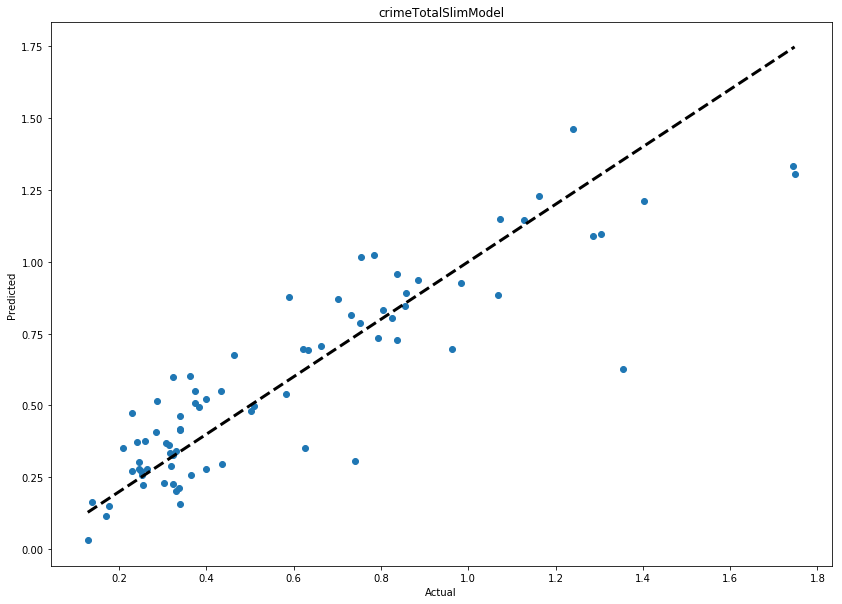

In [35]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelSlim_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimeTotalSlimModel')

In [36]:
# Review OLS
totalCrimeLRModelSlim = sm.ols("CrimeTotal~Poverty+NoDiploma+Dependency+VacantBuildings+AbandonedVehicles+StreetLights",crimeTotalData)
totalCrimeLRModelSlim = totalCrimeLRModelSlim.fit()
print totalCrimeLRModelSlim.summary()

                            OLS Regression Results                            
Dep. Variable:             CrimeTotal   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     42.90
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           1.48e-21
Time:                        18:56:40   Log-Likelihood:                 24.842
No. Observations:                  77   AIC:                            -35.68
Df Residuals:                      70   BIC:                            -19.28
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2771      0.12

### Findings:
>This slimmed model has an adjusted R-squared of 0.768 compared to the full model adjusted R-squared of 0.774. The reduction in predictive power is negligible and the slimmed model should be deployed.

# CrimePerson Linear Regression Modeling

In [37]:
# remove CrimeTotal, CrimeProperty, CrimeSociety in order to test CrimeTotal
crimePersonData = crimeClean1.drop(['CrimeProperty', 'CrimeSociety', 'CrimeTotal'], axis=1)
crimePersonData.head()

,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson
0,0.240,0.071,0.093,0.164,0.272,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.109763
1,0.174,0.076,0.100,0.171,0.383,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.063245
2,0.239,0.038,0.101,0.108,0.233,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.090469
3,0.127,0.016,0.079,0.106,0.260,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.060745
4,0.061,0.006,0.046,0.060,0.278,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.037374


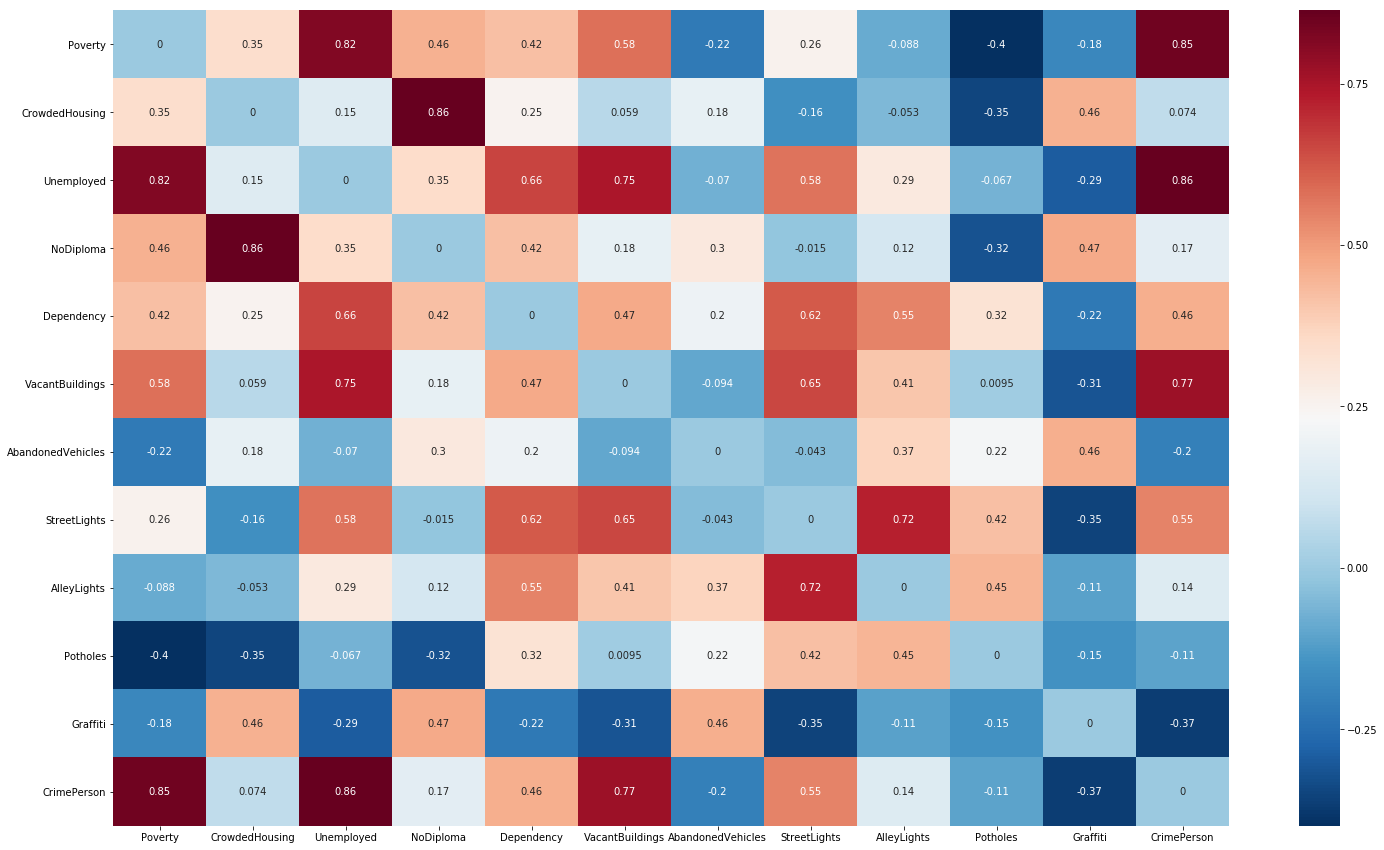

In [38]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = crimePersonData.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### Findings:
>CrimePerson is highly correlated with Poverty, Unemployed, and VacantBuildings.

>CrimePerson is moderately correlated with Dependency and StreetLights.

>CrimePerson is weakly correlated with NoDiploma and AllyLights.

>CrimePerson has a weak negative correlation with AbandonedVehicles and Potholes.

>CrimePerson has a moderate negative correlation with Graffiti.

### All Variable Model

In [39]:
#assigning columns to X and Y variables
y = crimePersonData['CrimePerson'] 
X = crimePersonData.drop(['CrimePerson'], axis =1)

In [40]:
# create full dataset model
modelFull = lm.LinearRegression()
modelFull.fit(X, y)   
modelFull_y = modelFull.predict(X)
print 'Coefficients: ', modelFull.coef_
print "y-intercept ", modelFull.intercept_

Coefficients:  [ 0.70244451  0.5470819   0.35749198 -0.34375487 -0.23111478  1.11022388
  0.50641848  0.54739766 -0.21248194  0.16447697 -0.01135699]
y-intercept  -0.0385560696606


In [41]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelFull.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '0.702'),
 ('CrowdedHousing', '0.547'),
 ('Unemployed', '0.357'),
 ('NoDiploma', '-0.344'),
 ('Dependency', '-0.231'),
 ('VacantBuildings', '1.110'),
 ('AbandonedVehicles', '0.506'),
 ('StreetLights', '0.547'),
 ('AlleyLights', '-0.212'),
 ('Potholes', '0.164'),
 ('Graffiti', '-0.011')]

In [42]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelFull_y)
print "variance or r-squared: ", explained_variance_score(y, modelFull_y)

mean square error:  0.00130177691025
variance or r-squared:  0.913527820152


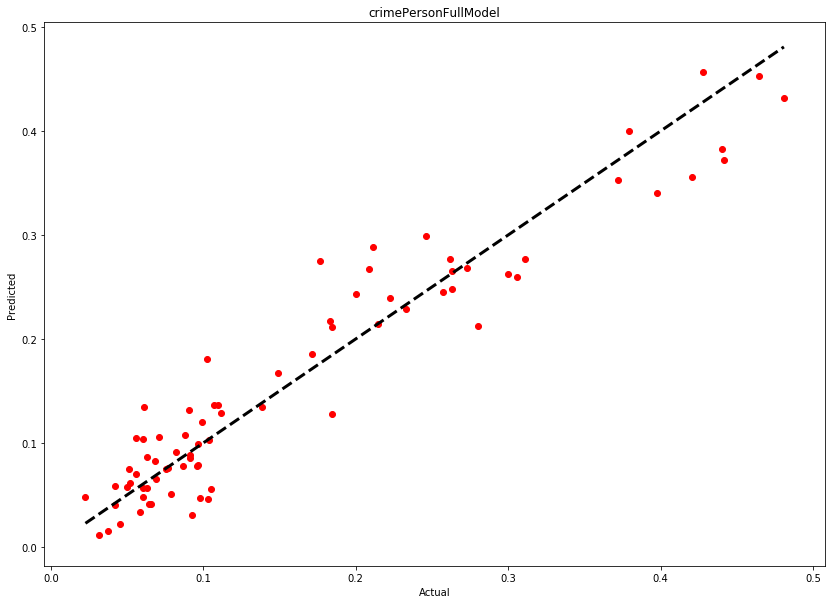

In [43]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelFull_y, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimePersonFullModel')

In [44]:
# Review OLS
crimePersonLRModelFull = sm.ols("CrimePerson~Poverty+CrowdedHousing+Unemployed+NoDiploma+Dependency+VacantBuildings+AbandonedVehicles+StreetLights+AlleyLights+Potholes+Graffiti",crimePersonData)
crimePersonLRModelFull = crimePersonLRModelFull.fit()
print crimePersonLRModelFull.summary()

                            OLS Regression Results                            
Dep. Variable:            CrimePerson   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           3.31e-30
Time:                        18:56:41   Log-Likelihood:                 146.54
No. Observations:                  77   AIC:                            -269.1
Df Residuals:                      65   BIC:                            -240.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0386      0.03

### Fingings: 
>There is no condition number warning and adjusted R-squared is 0.899. This is a great model for consideration. However, we may be able to reduce the number of variables needed and still get similar results.

>Review of P indicates that the following variables are siginificant, at the 95% confidence level, to the model: Poverty, Unemployed, NoDiploma, VacantBuildings, and StreetLights.

>We should evaluate a model using only the significant variables.

### Slimmed Variable Model

In [45]:
#assigning columns to X and Y variables
y = crimePersonData['CrimePerson'] 
X = crimePersonData.drop(['CrimePerson', 
                         'CrowdedHousing', 
                         'Dependency', 
                         'AbandonedVehicles', 
                         'AlleyLights', 
                         'Potholes', 
                         'Graffiti'], 
                        axis =1)

In [46]:
# create slimmed dataset model
modelSlim = lm.LinearRegression()
modelSlim.fit(X, y)   
modelSlim_y = modelSlim.predict(X)
print 'Coefficients: ', modelSlim.coef_
print "y-intercept ", modelSlim.intercept_

Coefficients:  [ 0.67638834  0.26072057 -0.24560591  1.22669566  0.35161902]
y-intercept  -0.0357930913827


In [47]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelSlim.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '0.676'),
 ('Unemployed', '0.261'),
 ('NoDiploma', '-0.246'),
 ('VacantBuildings', '1.227'),
 ('StreetLights', '0.352')]

In [48]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelSlim_y)
print "variance or r-squared: ", explained_variance_score(y, modelSlim_y)

mean square error:  0.00150058691084
variance or r-squared:  0.900321614087


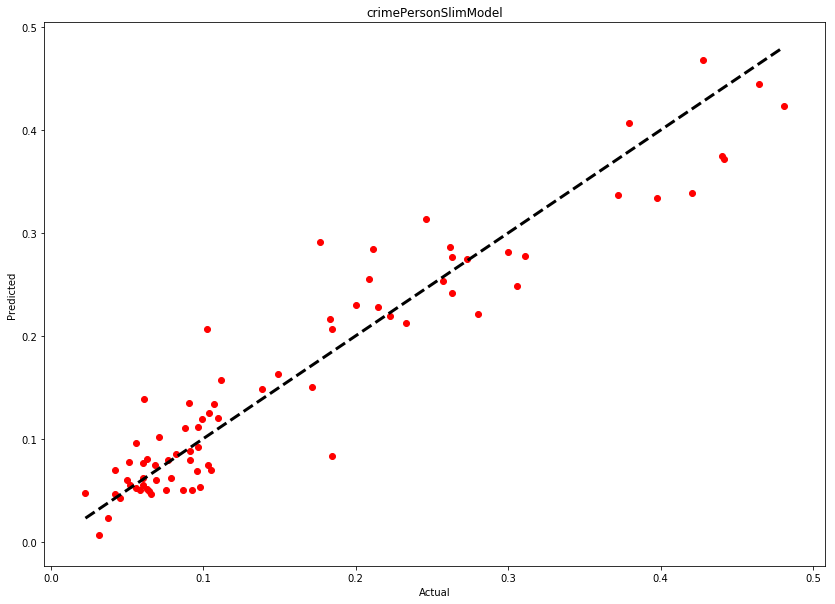

In [49]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelSlim_y, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimePersonSlimModel')

In [50]:
# Review OLS
crimePersonLRModelSlim = sm.ols("CrimePerson~Poverty+Unemployed+NoDiploma+VacantBuildings+StreetLights",crimePersonData)
crimePersonLRModelSlim = crimePersonLRModelSlim.fit()
print crimePersonLRModelSlim.summary()

                            OLS Regression Results                            
Dep. Variable:            CrimePerson   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     128.3
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           4.06e-34
Time:                        18:56:42   Log-Likelihood:                 141.06
No. Observations:                  77   AIC:                            -270.1
Df Residuals:                      71   BIC:                            -256.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0358      0.015     

### Findings:
>This slimmed model has an adjusted R-squared of 0.893 compared to the full model adjusted R-squared of 0.899. The reduction in predictive power is negligible and the slimmed model should be deployed.

# CrimeProperty Linear Regression Modeling

In [51]:
# remove CrimePerson, CrimeTotal, CrimeSociety in order to test CrimeTotal
crimePropertyData = crimeClean1.drop(['CrimePerson', 'CrimeSociety', 'CrimeTotal'], axis=1)
crimePropertyData.head()

,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimeProperty
0,0.240,0.071,0.093,0.164,0.272,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.182175
1,0.174,0.076,0.100,0.171,0.383,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.135651
2,0.239,0.038,0.101,0.108,0.233,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.179518
3,0.127,0.016,0.079,0.106,0.260,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.150001
4,0.061,0.006,0.046,0.060,0.278,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.174412


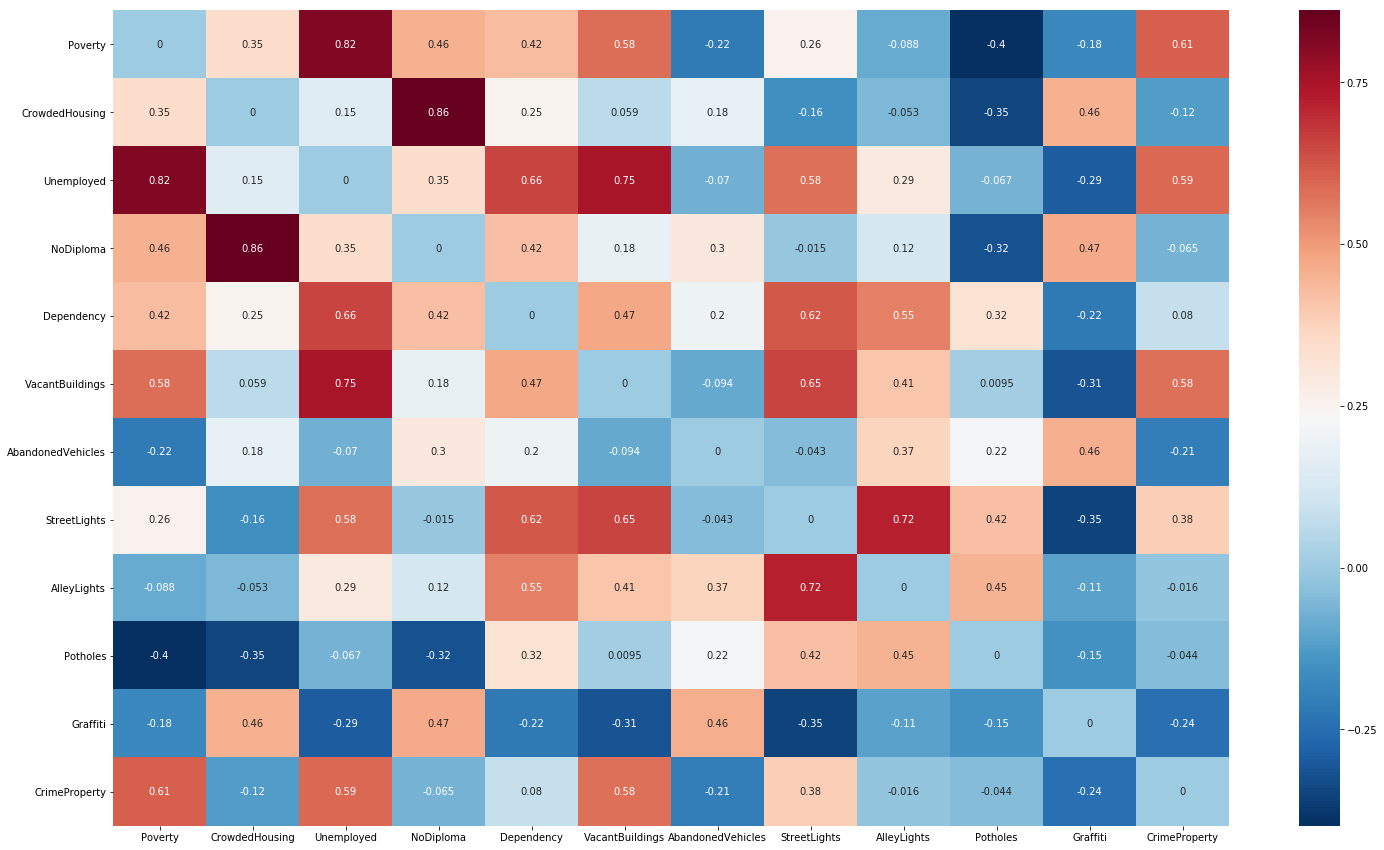

In [52]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = crimePropertyData.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### Findings:
>CrimeProperty is moderately correlated with Poverty, Unemployment, VacantBuildings, and StreetLights.

>CrimeProperty has a weak negative correlation with CrowdedHousing, AbandonedVehicles, and Graffiti.

### All Variable Model

In [53]:
#assigning columns to X and Y variables
y = crimePropertyData['CrimeProperty'] 
X = crimePropertyData.drop(['CrimeProperty'], axis =1)

In [54]:
# create full dataset model
modelFull = lm.LinearRegression()
modelFull.fit(X, y)   
modelFull_y = modelFull.predict(X)
print 'Coefficients: ', modelFull.coef_
print "y-intercept ", modelFull.intercept_

Coefficients:  [ 0.90447784  0.1986942   0.56671677 -0.28781068 -1.5336878   1.18722619
  1.07006235  1.24192836 -0.84797935  0.79656541  0.01406051]
y-intercept  0.304375977578


In [55]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelFull.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '0.904'),
 ('CrowdedHousing', '0.199'),
 ('Unemployed', '0.567'),
 ('NoDiploma', '-0.288'),
 ('Dependency', '-1.534'),
 ('VacantBuildings', '1.187'),
 ('AbandonedVehicles', '1.070'),
 ('StreetLights', '1.242'),
 ('AlleyLights', '-0.848'),
 ('Potholes', '0.797'),
 ('Graffiti', '0.014')]

In [56]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelFull_y)
print "variance or r-squared: ", explained_variance_score(y, modelFull_y)

mean square error:  0.00683749432247
variance or r-squared:  0.723998511874


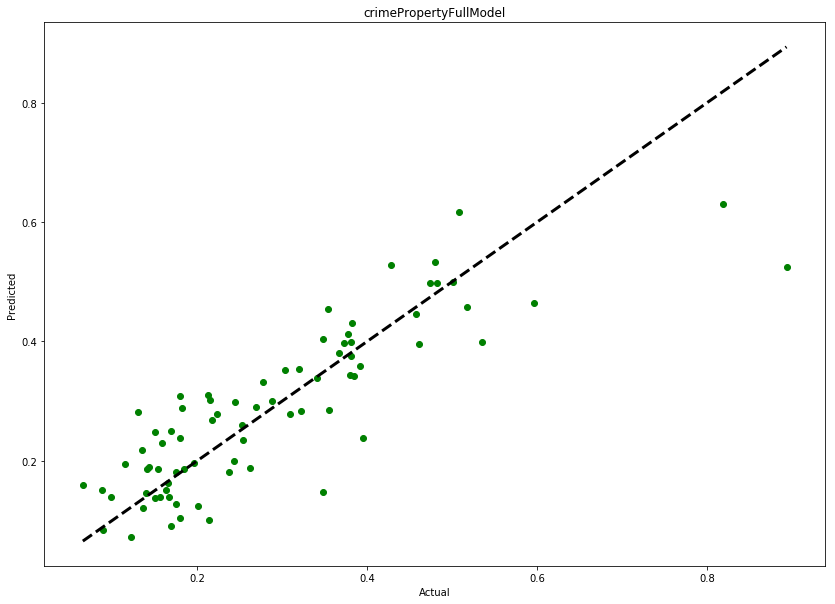

In [57]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelFull_y, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimePropertyFullModel')

In [58]:
# Review OLS
crimePropertyDataLRModelFull = sm.ols("CrimeProperty~Poverty+CrowdedHousing+Unemployed+NoDiploma+Dependency+VacantBuildings+AbandonedVehicles+StreetLights+AlleyLights+Potholes+Graffiti",crimePropertyData)
crimePropertyDataLRModelFull = crimePropertyDataLRModelFull.fit()
print crimePropertyDataLRModelFull.summary()

                            OLS Regression Results                            
Dep. Variable:          CrimeProperty   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     15.50
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           2.90e-14
Time:                        18:56:43   Log-Likelihood:                 82.677
No. Observations:                  77   AIC:                            -141.4
Df Residuals:                      65   BIC:                            -113.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3044      0.07

### Findings:
>There is no condition number warning and adjusted R-squared is 0.677. This is a okay model for consideration. However, we may be able to reduce the number of variables needed and still get similar results.

>Review of P indicates that the following variables are siginificant, at the 95% confidence level, to the model: Poverty, Dependency, StreetLights, and Potholes.

>We should evaluate a model using only the significant variables.

### Slimmed Variable Model

In [59]:
#assigning columns to X and Y variables
y = crimePropertyData['CrimeProperty'] 
X = crimePropertyData.drop(['CrimeProperty', 
                           'CrowdedHousing',
                           'Unemployed',
                           'NoDiploma',
                           'VacantBuildings',
                           'AbandonedVehicles',
                           'AlleyLights',
                           'Graffiti'], axis =1)

In [60]:
# create full dataset model
modelSlim = lm.LinearRegression()
modelSlim.fit(X, y)   
modelSlim_y = modelSlim.predict(X)
print 'Coefficients: ', modelSlim.coef_
print "y-intercept ", modelSlim.intercept_

Coefficients:  [ 1.29345541 -1.6650296   1.43046703  1.04055272]
y-intercept  0.288606088284


In [61]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelSlim.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '1.293'),
 ('Dependency', '-1.665'),
 ('StreetLights', '1.430'),
 ('Potholes', '1.041')]

In [62]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelSlim_y)
print "variance or r-squared: ", explained_variance_score(y, modelSlim_y)

mean square error:  0.00833657791122
variance or r-squared:  0.663486680813


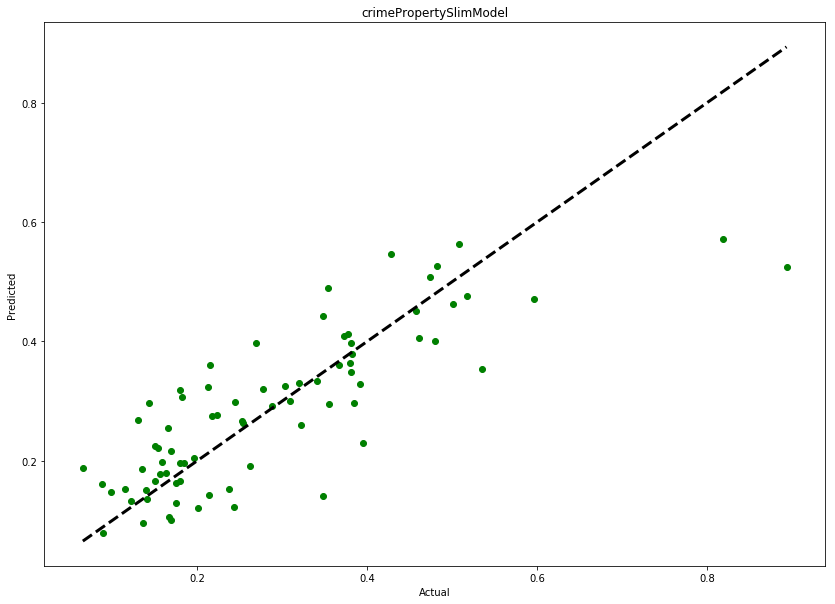

In [63]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelSlim_y, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimePropertySlimModel')

In [64]:
# Review OLS
crimePropertyLRModelSlim = sm.ols("CrimeProperty~Poverty+Dependency+StreetLights+Potholes",crimePropertyData)
crimePropertyLRModelSlim = crimePropertyLRModelSlim.fit()
print crimePropertyLRModelSlim.summary()

                            OLS Regression Results                            
Dep. Variable:          CrimeProperty   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     35.49
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           2.33e-16
Time:                        18:56:43   Log-Likelihood:                 75.045
No. Observations:                  77   AIC:                            -140.1
Df Residuals:                      72   BIC:                            -128.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2886      0.065      4.423   

### Findings:
>This slimmed model has an adjusted R-squared of 0.645 compared to the full model adjusted R-squared of 0.677. The reduction in predictive power is low and between the full and slimmed model the slimmed model should be the one deployed.

>The predictive power of linear regression modeling for crime against property is only moderately useful using the data available in this dataset. In the future, it would be recommended to continue looking for other data that may be useful for predicting this kind of crime or to try other modeling methods.

# CrimeSociety Linear Regression Modeling

In [65]:
# remove CrimePerson, CrimeProperty, CrimeSociety in order to test CrimeTotal
crimeSocietyData = crimeClean1.drop(['CrimeProperty', 'CrimePerson', 'CrimeTotal'], axis=1)
crimeSocietyData.head()

,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,VacantBuildings,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimeSociety
0,0.240,0.071,0.093,0.164,0.272,0.000891,0.051117,0.025059,0.024095,0.119947,0.178193,0.080850
1,0.174,0.076,0.100,0.171,0.383,0.001640,0.066303,0.034375,0.029204,0.163423,0.220845,0.047636
2,0.239,0.038,0.101,0.108,0.233,0.001153,0.030819,0.022586,0.014779,0.073667,0.189046,0.091462
3,0.127,0.016,0.079,0.106,0.260,0.001899,0.056972,0.040817,0.026866,0.141190,0.466589,0.048920
4,0.061,0.006,0.046,0.060,0.278,0.002950,0.069633,0.046663,0.032008,0.152101,0.533436,0.039006


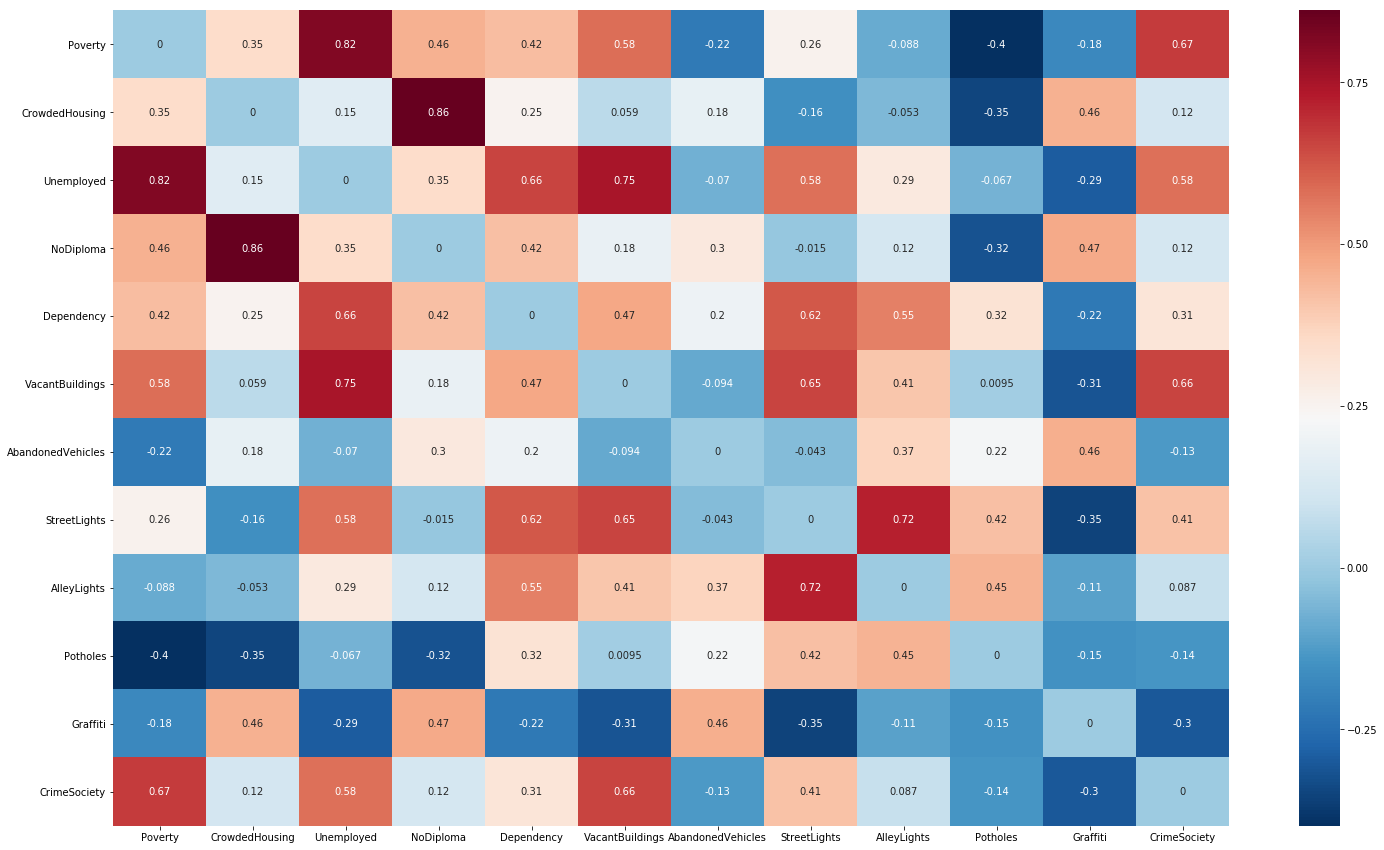

In [66]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = crimeSocietyData.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### Findings:
>CrimeSociety is highly correlated with Poverty and VacantBuildings.

>CrimeSociety is moderately correlated with Unemployment, Dependency and StreetLights.

>CrimeSociety is weakly correlated with CrowdedHousing and NoDiploma.

>CrimeSociety has a weak negative correlation with AdandonedVehicles and Potholes.

>CrimeSociety has a moderate negative correlation with Graffiti.

### All Variable Model

In [67]:
#assigning columns to X and Y variables
y = crimeSocietyData['CrimeSociety'] 
X = crimeSocietyData.drop(['CrimeSociety'], axis =1)

In [68]:
# create full dataset model
modelFull = lm.LinearRegression()
modelFull.fit(X, y)   
modelFull_y = modelFull.predict(X)
print 'Coefficients: ', modelFull.coef_
print "y-intercept ", modelFull.intercept_

Coefficients:  [ 0.97708104  1.00223729 -0.75691289 -0.44278877 -0.08817593  2.418767
  1.31572679  0.81410275 -0.34975824  0.01292283 -0.05337167]
y-intercept  -0.0465580192163


In [69]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelFull.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '0.977'),
 ('CrowdedHousing', '1.002'),
 ('Unemployed', '-0.757'),
 ('NoDiploma', '-0.443'),
 ('Dependency', '-0.088'),
 ('VacantBuildings', '2.419'),
 ('AbandonedVehicles', '1.316'),
 ('StreetLights', '0.814'),
 ('AlleyLights', '-0.350'),
 ('Potholes', '0.013'),
 ('Graffiti', '-0.053')]

In [70]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelFull_y)
print "variance or r-squared: ", explained_variance_score(y, modelFull_y)

mean square error:  0.00530702502626
variance or r-squared:  0.673548368442


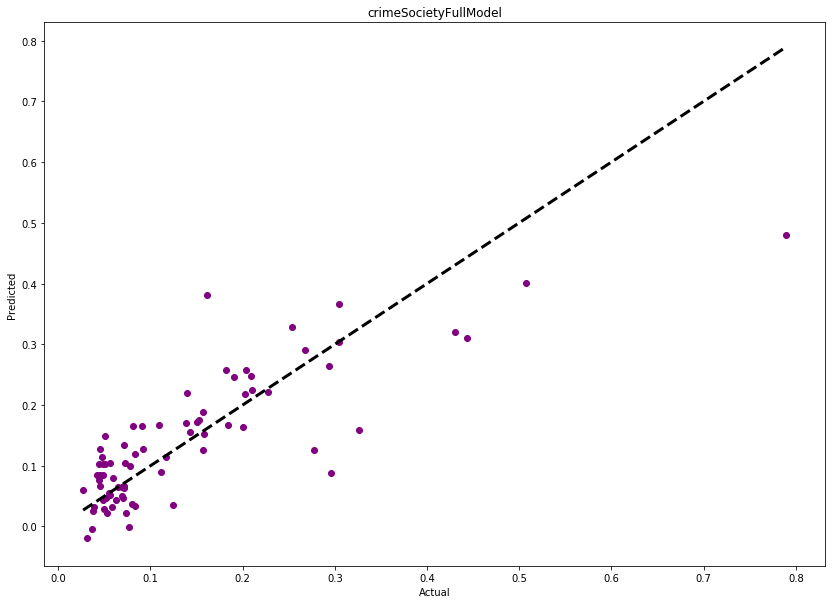

In [71]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelFull_y, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimeSocietyFullModel')

In [72]:
# Review OLS
totalCrimeLRModelFull = sm.ols("CrimeSociety~Poverty+CrowdedHousing+Unemployed+NoDiploma+Dependency+VacantBuildings+AbandonedVehicles+StreetLights+AlleyLights+Potholes+Graffiti",crimeSocietyData)
totalCrimeLRModelFull = totalCrimeLRModelFull.fit()
print totalCrimeLRModelFull.summary()

                            OLS Regression Results                            
Dep. Variable:           CrimeSociety   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     12.19
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           4.98e-12
Time:                        18:56:44   Log-Likelihood:                 92.433
No. Observations:                  77   AIC:                            -160.9
Df Residuals:                      65   BIC:                            -132.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0466      0.06

### Findings: 
>There is no condition number warning and adjusted R-squared is 0.618. This is a only a moderate model for consideration. However, we may be able to reduce the number of variables needed and still get similar results.

>Review of P indicates that the following variables are siginificant, at the 95% confidence level, to the model: Poverty, Unemployed, VacantBuildings, and AbondonedVehicles. 

>We should evaluate a model using only the significant variables.

### Slimmed Variable Model

In [73]:
#assigning columns to X and Y variables
y = crimeSocietyData['CrimeSociety'] 
X = crimeSocietyData.drop(['CrimeSociety', 
                          'CrowdedHousing',
                          'NoDiploma',
                          'Dependency',
                          'StreetLights',
                          'AlleyLights',
                          'Potholes',
                          'Graffiti'], axis =1)

In [74]:
# create full dataset model
crimeSocietySlimDataLRModel = lm.LinearRegression()
crimeSocietySlimDataLRModel.fit(X, y)   
crimeSocietySlimDataLRModel_y = crimeSocietySlimDataLRModel.predict(X)
print 'Coefficients: ', crimeSocietySlimDataLRModel.coef_
print "y-intercept ", crimeSocietySlimDataLRModel.intercept_

Coefficients:  [ 0.73365586 -0.58758239  3.2307236   0.19857423]
y-intercept  -0.000320852374746


In [75]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in crimeSocietySlimDataLRModel.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Poverty', '0.734'),
 ('Unemployed', '-0.588'),
 ('VacantBuildings', '3.231'),
 ('AbandonedVehicles', '0.199')]

In [76]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, crimeSocietySlimDataLRModel_y)
print "variance or r-squared: ", explained_variance_score(y, crimeSocietySlimDataLRModel_y)

mean square error:  0.00666371298268
variance or r-squared:  0.590094268508


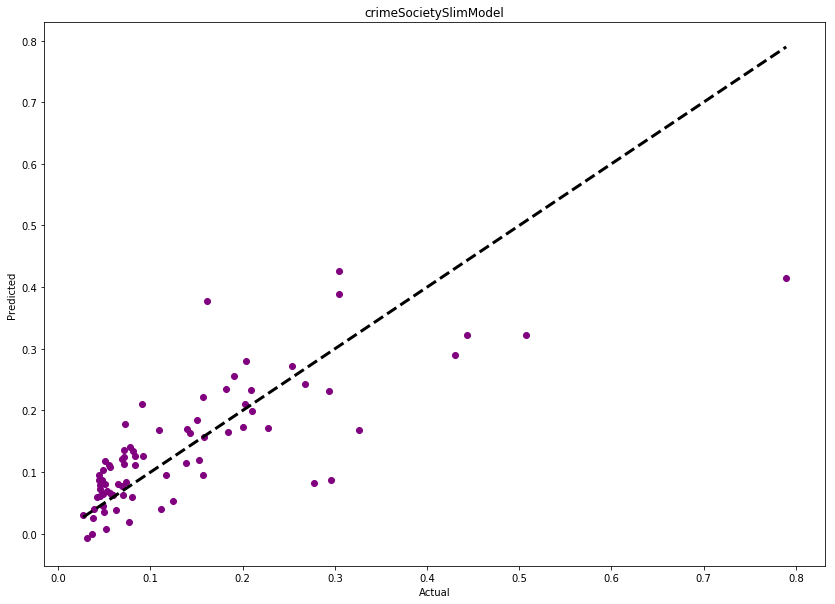

In [77]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, crimeSocietySlimDataLRModel_y, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('crimeSocietySlimModel')

In [78]:
# Review OLS
crimeSocietySlimDataLRModel = sm.ols("CrimeSociety~Poverty+Unemployed+VacantBuildings+AbandonedVehicles",crimeSocietyData)
crimeSocietySlimDataLRModel = crimeSocietySlimDataLRModel.fit()
print crimeSocietySlimDataLRModel.summary()

                            OLS Regression Results                            
Dep. Variable:           CrimeSociety   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     25.91
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           2.53e-13
Time:                        18:56:45   Log-Likelihood:                 83.668
No. Observations:                  77   AIC:                            -157.3
Df Residuals:                      72   BIC:                            -145.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0003      0.03

### Findings:
>This slimmed model has an adjusted R-squared of 0.567 compared to the full model adjusted R-squared of 0.618. The reduction in predictive power is low and between the full and slimmed model the slimmed model should be the one deployed.

>The predictive power of linear regression modeling for crime against property is only moderately useful using the data available in this dataset. In the future, it would be recommended to continue looking for other data that may be useful for predicting this kind of crime or to try other modeling methods.

# Final Conclusions on Community Area Analysis

### Project Description Reviewed
> To provide local law enforcement, local government, and community members key indicators for various types of crimes in Chicago and a means to predict crime in the future.

>The analysis will focus on different socioeconomic variables in an attempt to diagnois the population and different service requests recorded by the city to diagnois city infrstructure and upkeep to see if any of these variables are useful in explaining and predicting crime in the Chicago region.

### Findings:
> Through the use of combining socioeconomic data on the population and 311 calls to the city of Chicago that may indicate city infrastructure degradation/blight (a.k.a. the bad part of town) and using that data in an attempt to predict crime in the city of Chicago it is the opinion of this team that we have been able to accomplish our goal with varying levels of success depending on the type of crime we are trying to predict.

> Thru the use of linear regression we have been able to explain 0.774 of the variability, adjusted R-squared, in total crime in the city of Chicago in the 2012 - date of data pull 2017 timeframe provided in the crime dataset.

>> - When explaining the variability in crime against people we achieved a 0.893 adjusted R-squared.

>> - When explaining the variability in crime against property we achieved a 0.645 adjusted R-squared.

>> - When explaining the variability in crime against society we achieved a 0.567 adjusted R-squared.

> There is still room for secondary research in order to improve the crime against property and crime against society algorithms. 
>> - Improving the prediction power of either of these types of crime will also improve the algorithm for total crime as well. 

>> - The adjusted R-squared for crime against people is already very high and would not be as high of a priority as improving the regression models for the other types of crime.

> The variables that best predict crime overall in Chicago are:
>> - **Poverty:** percent of households living below the federal poverty level
>> - **NoDipolma:** percent of persons aged 25 years or older without a high school diploma
>> - **Dependency:** percent of the population under 18 or over 64 years of age
>> - **VacantBuildings:** number of vacant buildings reports per capita
>> - **AbandonedVehicles:** number of abandoned vehicle reports per capita
>> - **StreetLights:** number of street light being out reports per capita

> The variables that best predict crime against people in Chicago are:
>> - **Poverty:** percent of households living below the federal poverty level
>> - **Unemployed:** percent of persons aged 16 years or older in the labor force that are unemployed
>> - **NoDiploma:** percent of persons aged 25 years or older without a high school diploma
>> - **VacantBuildings:** number of vacant buildings reports per capita
>> - **StreetLights:** number of street light being out reports per capita

> The variables that best predict crime against property in Chicago are:
>> - **Poverty:** percent of households living below the federal poverty level
>> - **Dependency:** percent of the population under 18 or over 64 years of age
>> - **StreetLights:** number of street light being out reports per capita
>> - **Potholes:** number of pothole reports per capita

> The variables that best predict crime against society in Chicago are:

>> - **Poverty:** percent of households living below the federal poverty level
>> - **Unemployed:** percent of persons aged 16 years or older in the labor force that are unemployed
>> - **VacantBuildings:** number of vacant buildings reports per capita
>> - **AbandonedVehicles:** number of abandoned vehicle reports per capita

> This group acknowledges that the individual indicators for city blight may represent "correlation may not equate causation" and it would likely be better to develop a score system to measure the degree of degraded infrastructure. Doing so was not accomplishable in the timeframe given for this project.